# 01704926
#### Ching Wai Wong

# Part 1

### Task 1.2

In [1]:
# Import functions
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import biogeme.database as db
import biogeme.biogeme as bio
from biogeme import models
from biogeme.expressions import Beta

E:\Program Files\Python\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# import dataset from model_estiation_data
df = pd.read_csv('model_estimation_data.dat', sep='\t')
database = db.Database('model_estimation_data', df)

# import dataset from model_estiation_data
df = pd.read_csv('model_estimation_data.dat', sep='\t')
database = db.Database('model_estimation_data', df)

# The following statement allows you to use the names of the
# variable as Python variable.
globals().update(database.variables)

# Parameters to be estimated
ASC_Bus    = Beta('ASC_Bus',0,None,None,0)
ASC_Bike   = Beta('ASC_Bike',0,None,None,1)
ASC_Car    = Beta('ASC_Car',0,None,None,0)


# Definition of new variables
tot_cost_car = car_Cost + car_PCost

# Similarly now, define new variables for total time for car and total time for bus
tot_time_car = car_TT + car_PT
tot_time_bus = bus_IVT + bus_TA + bus_WT

# Bus Parameter
Beta_bus_Cost  = Beta('Beta_bus_Cost',0,None,None,0)
Beta_bus_TT = Beta('Beta_bus_TT',0,None,None,0)

# BS Parameter
Beta_BS_Cost = Beta('Beta_BS_Cost',0,None,None,0)
Beta_BS_TT = Beta('Beta_BS_TT',0,None,None,0)

# Car Parameter
Beta_Car_TT = Beta('Beta_Car_TT',0,None,None,0)
Beta_Car_Cost = Beta('Beta_Car_Cost',0,None,None,0)

# Definition of the utility functions
V1    =  ASC_Bus   +  Beta_bus_TT*tot_time_bus  + Beta_bus_Cost * bus_Cost
V2    =  ASC_Bike  +  Beta_BS_TT * BS_TT         + Beta_BS_Cost * BS_Cost 
V3    =  ASC_Car   +  Beta_Car_TT *tot_time_car + Beta_Car_Cost * tot_cost_car

# Associate utility functions with the numbering of alternatives
V = {1: V1, 2: V2, 3: V3}

# Associate the availability conditions with the alternatives
Bus_AV = 1
Bike_AV = 1
Car_AV = 1

av = {1: Bus_AV, 2: Bike_AV, 3: Car_AV}

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
logprob = models.loglogit(V, av, Choice)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'Task1.2'  

# Calculate the null log likelihood for reporting.
biogeme.calculateNullLoglikelihood(av)

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters(onlyRobust=False)
print(pandasResults)

                  Value   Std err     t-test       p-value  Rob. Std err  \
ASC_Bus        1.717914  1.622235   1.058980  2.896090e-01      1.511191   
ASC_Car       -0.043391  1.522791  -0.028495  9.772677e-01      1.453852   
Beta_BS_Cost  -0.364411  0.161900  -2.250838  2.439581e-02      0.151314   
Beta_BS_TT    -0.390686  0.033465 -11.674447  0.000000e+00      0.030233   
Beta_Car_Cost -0.608668  0.101120  -6.019254  1.752227e-09      0.108857   
Beta_Car_TT   -0.334013  0.021810 -15.314890  0.000000e+00      0.021676   
Beta_bus_Cost -0.047841  0.145063  -0.329796  7.415538e-01      0.151534   
Beta_bus_TT   -0.379742  0.026424 -14.371027  0.000000e+00      0.024839   

               Rob. t-test  Rob. p-value  
ASC_Bus           1.136794  2.556242e-01  
ASC_Car          -0.029846  9.761901e-01  
Beta_BS_Cost     -2.408303  1.602687e-02  
Beta_BS_TT      -12.922327  0.000000e+00  
Beta_Car_Cost    -5.591436  2.251990e-08  
Beta_Car_TT     -15.409068  0.000000e+00  
Beta_bus_Cost 

### Task 1.3

In [3]:
# The following statement allows you to use the names of the
# variable as Python variable.
globals().update(database.variables)

# Parameters to be estimated
ASC_Bus    = Beta('ASC_Bus',0,None,None,0)
ASC_Bike   = Beta('ASC_Bike',0,None,None,1)
ASC_Car    = Beta('ASC_Car',0,None,None,0)

# Bus Parameter
Beta_bus_Cost  = Beta('Beta_bus_Cost',0,None,None,0)
Beta_bus_IVT = Beta('Beta_bus_IVT',0,None,None,0)
Beta_bus_TA = Beta('Beta_bus_TA',0,None,None,0)
Beta_bus_WT = Beta('Beta_bus_WT',0,None,None,0)

# BS Parameter
Beta_BS_Cost = Beta('Beta_BS_Cost',0,None,None,0)
Beta_BS_TT = Beta('Beta_BS_TT',0,None,None,0)

# Car Parameter
Beta_Car_TT = Beta('Beta_Car_TT',0,None,None,0)
Beta_Car_PT = Beta('Beta_Car_PT',0,None,None,0)
Beta_Car_Cost = Beta('Beta_Car_Cost',0,None,None,0)
Beta_Car_PCost = Beta('Beta_Car_PCost',0,None,None,0)

# Definition of the utility functions
V1    =  ASC_Bus   +  Beta_bus_IVT * bus_IVT +  Beta_bus_TA * bus_TA +  Beta_bus_WT * bus_WT  + Beta_bus_Cost * bus_Cost
V2    =  ASC_Bike  +  Beta_BS_TT * BS_TT         + Beta_BS_Cost * BS_Cost 
V3    =  ASC_Car   +  Beta_Car_TT * car_TT +  Beta_Car_PT * car_PT  + Beta_Car_Cost * car_Cost + Beta_Car_PCost * car_PCost 

# Associate utility functions with the numbering of alternatives
V = {1: V1, 2: V2, 3: V3}

# Associate the availability conditions with the alternatives
Bus_AV = 1
Bike_AV = 1
Car_AV = 1

av = {1: Bus_AV, 2: Bike_AV, 3: Car_AV}

# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
logprob = models.loglogit(V, av, Choice)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'Task 1.3'  

# Calculate the null log likelihood for reporting.
biogeme.calculateNullLoglikelihood(av)

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters(onlyRobust=False)
print(pandasResults)


                   Value   Std err     t-test       p-value  Rob. Std err  \
ASC_Bus        -2.721378  1.948336  -1.396771  1.624825e-01      1.807699   
ASC_Car        -0.041925  1.662275  -0.025222  9.798782e-01      1.648370   
Beta_BS_Cost   -0.482563  0.182630  -2.642304  8.234399e-03      0.171955   
Beta_BS_TT     -0.460691  0.040059 -11.500353  0.000000e+00      0.033477   
Beta_Car_Cost  -0.257370  0.142748  -1.802963  7.139406e-02      0.153938   
Beta_Car_PCost -1.042329  0.155856  -6.687774  2.265899e-11      0.167897   
Beta_Car_PT    -0.546035  0.069368  -7.871610  3.552714e-15      0.064012   
Beta_Car_TT    -0.380804  0.026577 -14.328349  0.000000e+00      0.025747   
Beta_bus_Cost  -0.162786  0.159423  -1.021099  3.072077e-01      0.159804   
Beta_bus_IVT   -0.478033  0.035210 -13.576558  0.000000e+00      0.031949   
Beta_bus_TA    -0.035395  0.063868  -0.554180  5.794555e-01      0.064349   
Beta_bus_WT    -0.210006  0.065775  -3.192776  1.409123e-03      0.065942   

In [4]:
W1=sum(df.Choice==1)
W2=sum(df.Choice==2)
W3=sum(df.Choice==3)

print(W1, W2, W3)

265 139 596


### Task 1.4

In [5]:
# Sample enumeration
# Beta
ASC_Bus=pandasResults.at['ASC_Bus', 'Value']
ASC_Car=pandasResults.at['ASC_Car', 'Value']
ASC_Bike=0
Beta_BS_Cost=pandasResults.at['Beta_BS_Cost', 'Value']  
Beta_BS_TT=pandasResults.at['Beta_BS_TT', 'Value']     
Beta_Car_Cost=pandasResults.at['Beta_Car_Cost', 'Value']  
Beta_Car_PCost=pandasResults.at['Beta_Car_PCost', 'Value']
Beta_Car_PT=pandasResults.at['Beta_Car_PT', 'Value']   
Beta_Car_TT=pandasResults.at['Beta_Car_TT', 'Value']
Beta_bus_Cost=pandasResults.at['Beta_bus_Cost', 'Value']  
Beta_bus_IVT=pandasResults.at['Beta_bus_IVT', 'Value']  
Beta_bus_TA=pandasResults.at['Beta_bus_TA', 'Value']   
Beta_bus_WT=pandasResults.at['Beta_bus_WT', 'Value'] 

In [6]:
df['V1']=ASC_Bus+ Beta_bus_IVT*df['bus_IVT']+Beta_bus_TA * df['bus_TA'] +  Beta_bus_WT * df['bus_WT']  + Beta_bus_Cost * df['bus_Cost']
df['V2']=Beta_BS_TT * df['BS_TT'] + Beta_BS_Cost * df['BS_Cost']
df['V3']=ASC_Car +  Beta_Car_TT * df['car_TT'] +  Beta_Car_PT * df['car_PT']  + Beta_Car_Cost * df['car_Cost'] + Beta_Car_PCost * df['car_PCost'] 
df['P1 Sample_En']=np.exp(df['V1'])/(np.exp(df['V1'])+np.exp(df['V2'])+np.exp(df['V3']))
df['P2 Sample_En']=np.exp(df['V2'])/(np.exp(df['V1'])+np.exp(df['V2'])+np.exp(df['V3']))
df['P3 Sample_En']=np.exp(df['V3'])/(np.exp(df['V1'])+np.exp(df['V2'])+np.exp(df['V3']))
W1_Sample_Enumeration=df['P1 Sample_En'].sum()/1000
W2_Sample_Enumeration=df['P2 Sample_En'].sum()/1000
W3_Sample_Enumeration=df['P3 Sample_En'].sum()/1000
print(W1_Sample_Enumeration, W2_Sample_Enumeration, W3_Sample_Enumeration)


0.26500168810248176 0.13900044974937964 0.5959978621481385


In [7]:
df

,ID,bus_IVT,bus_TA,bus_WT,bus_Cost,BS_TT,BS_Cost,car_TT,car_PT,car_Cost,car_PCost,Choice,V1,V2,V3,P1 Sample_En,P2 Sample_En,P3 Sample_En
0,1,20,10,15,6,50,1.5,45,2,4,5,1,-16.762792,-23.758395,-24.511313,9.986545e-01,0.000915,0.000431
1,2,30,5,10,4,60,3.5,35,2,4,5,3,-19.990545,-29.330432,-20.703270,6.709633e-01,0.000059,0.328978
2,3,20,5,10,4,40,1.5,15,8,4,5,1,-15.210216,-19.151485,-16.363392,7.490322e-01,0.014549,0.236419
3,4,30,5,10,6,50,1.5,45,2,2,5,1,-20.316118,-23.758395,-23.996574,9.458919e-01,0.030261,0.023847
4,5,40,10,10,6,40,1.5,35,2,2,5,2,-25.273420,-19.151485,-20.188530,1.617317e-03,0.737085,0.261297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,30,5,10,4,50,3.5,15,5,2,3,3,-19.990545,-24.723522,-12.125891,3.839333e-04,0.000003,0.999613
996,997,20,5,10,6,60,1.5,35,2,2,3,1,-15.535788,-28.365305,-18.103873,9.287768e-01,0.000002,0.071221
997,998,50,5,10,6,50,1.5,15,2,4,5,3,-29.876776,-23.758395,-13.087182,5.109306e-08,0.000023,0.999977
998,999,30,10,15,4,40,1.5,45,5,4,3,2,-21.217549,-19.151485,-24.064761,1.117107e-01,0.881809,0.006480


In [8]:
# Average Individual Approach
V_Bus=ASC_Bus+Beta_bus_IVT*np.average(df['bus_IVT'])+Beta_bus_TA * np.average(df['bus_TA']) +  Beta_bus_WT * np.average(df['bus_WT'])  + Beta_bus_Cost * np.average(df['bus_Cost'])
V_Bike=Beta_BS_TT * np.average(df['BS_TT']) + Beta_BS_Cost * np.average(df['BS_Cost'])
V_Car=ASC_Car +  Beta_Car_TT * np.average(df['car_TT']) +  Beta_Car_PT * np.average(df['car_PT'])  + Beta_Car_Cost * np.average(df['car_Cost']) + Beta_Car_PCost * np.average(df['car_PCost'])

W1_Avg_Ind=np.exp(V_Bus)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car))
W2_Avg_Ind=np.exp(V_Bike)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car))
W3_Avg_Ind=np.exp(V_Car)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car))

print(W1_Avg_Ind, W2_Avg_Ind, W3_Avg_Ind)

0.01524770011519379 0.0051972966236176225 0.9795550032611885


In [9]:
(W3_Sample_Enumeration-W3/1000)/(W3/1000)*100

-0.00035869997674964723

# Task 2

### Task 2.1

In [10]:
IVTT_bus = 25
AT_bus=5
WT_bus=7.5
C_bus=5
TT_Car=25
PT_Car=2
TC_Car=3
PC_Car=5
TT_Bike=35
C_Bike=2.5

V_Bus=ASC_Bus+Beta_bus_IVT*IVTT_bus+Beta_bus_TA *AT_bus +  Beta_bus_WT * WT_bus  + Beta_bus_Cost *C_bus
V_Bike=Beta_BS_TT * TT_Bike + Beta_BS_Cost * C_Bike
V_Car=ASC_Car +  Beta_Car_TT * TT_Car +  Beta_Car_PT * PT_Car  + Beta_Car_Cost * TC_Car + Beta_Car_PCost * PC_Car

# Market Share
P1_2_4 = np.exp(V_Bus)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car))
P2_2_4 = np.exp(V_Bike)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car))
P3_2_4 = np.exp(V_Car)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car))


print(V_Bus, V_Bike, V_Car)
print(P1_2_4, P2_2_4, P3_2_4)

-17.238151488835328 -17.330593327997445 -16.637856172762145
0.26778355864099224 0.24413886885257438 0.48807757250643347


In [11]:
WT_bus=5

V_Bus=ASC_Bus+Beta_bus_IVT*IVTT_bus+Beta_bus_TA *AT_bus +  Beta_bus_WT * WT_bus  + Beta_bus_Cost *C_bus

# Market Share
P1_2_6 = np.exp(V_Bus)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car))
P2_2_6 = np.exp(V_Bike)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car))
P3_2_6 = np.exp(V_Car)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car))

print(V_Bus)
print(P1_2_6, P2_2_6, P3_2_6)

-16.713136304609566
0.38204389105740827 0.20604167964020353 0.41191442930238825


### Task 2.2

Text(0, 0.5, 'Market share')

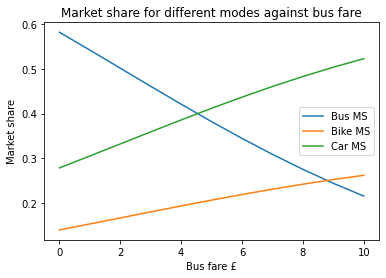

In [12]:
fares= list(range(11))

p1_f=[]
p2_f=[]
p3_f=[]
V_f=[]


# find market share for each bus fare
for i in fares:
    k=ASC_Bus+Beta_bus_IVT*IVTT_bus+Beta_bus_TA *AT_bus +  Beta_bus_WT * WT_bus  + Beta_bus_Cost *i
    V_f.append(k)
    
    p1_f.append(np.exp(k)/(np.exp(k)+np.exp(V_Bike)+np.exp(V_Car)))
    p2_f.append(np.exp(V_Bike)/(np.exp(k)+np.exp(V_Bike)+np.exp(V_Car)))
    p3_f.append(np.exp(V_Car)/(np.exp(k)+np.exp(V_Bike)+np.exp(V_Car)))

    
plt.plot(fares,p1_f,label = 'Bus MS')
plt.plot(fares,p2_f,label = 'Bike MS')
plt.plot(fares,p3_f,label = 'Car MS')

plt.legend()
plt.title('Market share for different modes against bus fare')
plt.xlabel('Bus fare £')
plt.ylabel('Market share')

# Task 3

### Task3.1

In [13]:
miu = -Beta_bus_Cost
WT_bus=7.5
# fare = 5 GBP
V_Bus=ASC_Bus+Beta_bus_IVT*IVTT_bus+Beta_bus_TA *AT_bus +  Beta_bus_WT * WT_bus  + Beta_bus_Cost *C_bus
print(V_Bus,V_Bike,V_Car)

# Baseline
C_base = 1/miu * np.log(np.exp(V_Bus) + np.exp(V_Bike) + np.exp(V_Car))
print(C_base)

EC_4=[]
DeltaEC_4=[]
EC_6=[]  
DeltaEC_6=[]

-17.238151488835328 -17.330593327997445 -16.637856172762145
-97.80050234032491


In [14]:
# Expected utility
for x in fares:
    V_Bus_4=ASC_Bus+Beta_bus_IVT*IVTT_bus+Beta_bus_TA *AT_bus +  Beta_bus_WT * WT_bus  + Beta_bus_Cost *x
    ec_4 = 1/miu*np.log(np.exp(V_Bus_4) + np.exp(V_Bike) + np.exp(V_Car))
    EC_4.append(ec_4)
    DeltaEC_4.append(ec_4-C_base)
    
    
    print(V_Bus_4)

-16.424220329685742
-16.587006561515658
-16.749792793345577
-16.912579025175493
-17.075365257005412
-17.238151488835328
-17.400937720665247
-17.563723952495163
-17.726510184325083
-17.889296416155
-18.052082647984918


In [15]:
WT_bus=5
for x in fares:
    V_Bus_6=ASC_Bus+Beta_bus_IVT*IVTT_bus+Beta_bus_TA *AT_bus +  Beta_bus_WT * WT_bus  + Beta_bus_Cost *x
    ec_6 = 1/miu*np.log(np.exp(V_Bus_6) + np.exp(V_Bike) + np.exp(V_Car))
    EC_6.append(ec_6)
    DeltaEC_6.append(ec_6-C_base)
    
    print(V_Bus_6)

-15.899205145459979
-16.061991377289896
-16.224777609119812
-16.38756384094973
-16.550350072779647
-16.713136304609566
-16.875922536439482
-17.0387087682694
-17.201495000099317
-17.364281231929237
-17.527067463759153


In [16]:
EC_4

[-96.018506500109,
 -96.4506259133967,
 -96.84334225456172,
 -97.19800387880792,
 -97.5163643414385,
 -97.80050234032491,
 -98.05273439735186,
 -98.27552726432502,
 -98.47141593525328,
 -98.64293155291966,
 -98.79254176026086]

In [17]:
DeltaEC_4_Pop = [i * 1000 for i in DeltaEC_4]
DeltaEC_4_Pop

[1781.9958402159132,
 1349.8764269282049,
 957.1600857631921,
 602.498461516987,
 284.1379988864077,
 0.0,
 -252.2320570269443,
 -475.02492400010965,
 -670.9135949283649,
 -842.4292125947517,
 -992.0394199359492]

In [18]:
EC_6

[-94.34938565252354,
 -94.9119357488422,
 -95.4341263819815,
 -95.91566587887942,
 -96.35679703012615,
 -96.75828446073173,
 -97.1213755865884,
 -97.44773929888552,
 -97.73938855359786,
 -97.99859405353494,
 -98.227796153564]

###### 

In [19]:
DeltaEC_6_Pop = [i * 1000 for i in DeltaEC_6]
DeltaEC_6_Pop

[3451.1166878013737,
 2888.566591482714,
 2366.375958343411,
 1884.836461445488,
 1443.7053101987658,
 1042.2178795931814,
 679.1267537365115,
 352.7630414393883,
 61.11378672704859,
 -198.09171321003305,
 -427.2938132390891]

### Task 3.2

In [20]:
P_Bus_No_Congestion=[]
P_Car_No_Congestion=[]
P_Bike_No_Congestion=[]

V_Bike=Beta_BS_TT * TT_Bike + Beta_BS_Cost * C_Bike
V_Car=ASC_Car +  Beta_Car_TT * TT_Car +  Beta_Car_PT * PT_Car  + Beta_Car_Cost * TC_Car + Beta_Car_PCost * PC_Car

fares=list(range(10))
for x in fares:
    V_Bus=ASC_Bus+Beta_bus_IVT*IVTT_bus+Beta_bus_TA *AT_bus +  Beta_bus_WT * WT_bus  + Beta_bus_Cost *x
    
    P_Bus = (np.exp(V_Bus)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car)))
    P_Bus_No_Congestion.append(P_Bus)
    P_Bike = (np.exp(V_Bike)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car)))
    P_Bike_No_Congestion.append(P_Bike)
    P_Car = (np.exp(V_Car)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car)))
    P_Car_No_Congestion.append(P_Car)


In [21]:
#4 buses per hour
IVTT_bus = 25
AT_bus=5
WT_bus=7.5 #freq =4
TT_Car=25
PT_Car=2
TC_Car=3
PC_Car=5
TT_Bike=35
C_Bike=2.5

tf0=1/3
K=200
#initialise the market share of cars, bike and buses no congestion

P_Bus_No_Congestion=[]
P_Car_No_Congestion=[]
P_Bike_No_Congestion=[]

fares=list(range(11))


for x in fares:
    V_Bus=ASC_Bus+Beta_bus_IVT*IVTT_bus+Beta_bus_TA *AT_bus +  Beta_bus_WT * WT_bus  + Beta_bus_Cost *x
    
    P_Bus = (np.exp(V_Bus)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car)))
    P_Bus_No_Congestion.append(P_Bus)
    P_Bike = (np.exp(V_Bike)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car)))
    P_Bike_No_Congestion.append(P_Bike)
    P_Car = (np.exp(V_Car)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car)))
    P_Car_No_Congestion.append(P_Car)

It_Count_4=[]
TT_4=[]
Vflow4_final=[]
C_4_final=[]
P_Car_Congestion_final=[]



for k in fares:
    #intialise the vflow
    Vflow4=[]
    Vflow4.append(P_Car_No_Congestion[k]*1000)

    TTv_4=[0]
    Delta_C_4=[]
    P_Car_Congestion=[]
    C_4=[]
    Delta_4=[] 


    
    V_Bus_4=ASC_Bus+Beta_bus_IVT*IVTT_bus+Beta_bus_TA *AT_bus +  Beta_bus_WT * WT_bus  + Beta_bus_Cost *k
    V_Bike_4= Beta_BS_TT * TT_Bike + Beta_BS_Cost * C_Bike


    for i in range(1000):
        
        TTv_4_new=tf0*(1+0.15*(Vflow4[-1]/K)**4)*60
        TTv_4.append(TTv_4_new) 

        V_Car_4=ASC_Car +  Beta_Car_TT * TTv_4[-1] +  Beta_Car_PT * PT_Car  + Beta_Car_Cost * TC_Car + Beta_Car_PCost * PC_Car


        P_Bus_Congestion = np.exp(V_Bus_4)/(np.exp(V_Bus_4) + np.exp(V_Bike_4) + np.exp(V_Car_4))
        P_Bike_Congestion = np.exp(V_Bike_4)/(np.exp(V_Bus_4) + np.exp(V_Bike_4) + np.exp(V_Car_4))
        P_Car_New = np.exp(V_Car_4)/(np.exp(V_Bus_4) + np.exp(V_Bike_4) + np.exp(V_Car_4))
        P_Car_Congestion.append(P_Car_New)

        #vflow for next iteration using weighted constant
        Vflow4_new=0.15*(P_Car_New*1000)+0.85*Vflow4[-1]
        Vflow4.append(Vflow4_new)


        C_4_new = 1/miu * np.log(np.exp(V_Bus_4) + np.exp(V_Bike_4) + np.exp(V_Car_4))
        C_4.append(C_4_new)
        Delta_C_4.append((C_4-C_base)*1000)


        Delta_4.append(abs(TTv_4_new-TTv_4[i]))
        if Delta_4[i]<0.0001:
            break
    #print(Vflow4)
    #print(TTv_4)
    
    
    
    It_Count_4.append(i+1)
    TT_4.append(TTv_4[-1])
    Vflow4_final.append(Vflow4[-1])
    C_4_final.append(C_4[-1])
    P_Car_Congestion_final.append(P_Car_Congestion[-1])

In [22]:
It_Count_4

[12, 12, 15, 16, 16, 18, 20, 22, 23, 23, 22]

In [23]:
Vflow4_final

[242.9521707704309,
 245.36052513029819,
 247.5908658411827,
 249.64775212042497,
 251.53674148643907,
 253.26356882975537,
 254.83428213586143,
 256.2559468641275,
 257.53610398875816,
 258.68340004380923,
 259.706792151633]

In [24]:
TT_4

[26.532562351529037,
 26.79550535219832,
 27.045934950215955,
 27.28305364716311,
 27.50599537512834,
 27.714185688414926,
 27.907334604447094,
 28.085281089459873,
 28.248137813366224,
 28.396115680637077,
 28.529668416661508]

In [25]:
P_Car_Congestion_final

[0.24295283942638762,
 0.24535915096687966,
 0.2475917680250423,
 0.24964645144162123,
 0.25153567638759033,
 0.2532652814486311,
 0.25483641301691545,
 0.2562575852497359,
 0.2575342969071375,
 0.2586809534278846,
 0.2597087873665361]

In [26]:
Aggregate_Delta_C_4=[]
for x in fares:
    Aggregate_Delta_C_4.append((C_4_final[x]-C_4_final[5])*1000)

Aggregate_Delta_C_4

[3019.5272295133436,
 2343.883149199499,
 1702.410484513365,
 1096.9522504476004,
 529.1137213389874,
 0.0,
 -489.82207256116794,
 -940.2539472795866,
 -1351.7526518783711,
 -1725.2066987643816,
 -2061.9855323781735]

In [27]:
#6 buses per hour
IVTT_bus = 25
AT_bus=5
WT_bus=5 #freq =6
TT_Car=25
PT_Car=2
TC_Car=3
PC_Car=5
TT_Bike=35
C_Bike=2.5

tf0=1/3
K=200
#initialise the market share of cars, bike and buses no congestion

P_Bus_No_Congestion=[]
P_Car_No_Congestion=[]
P_Bike_No_Congestion=[]

fares=list(range(11))


for x in fares:
    V_Bus=ASC_Bus+Beta_bus_IVT*IVTT_bus+Beta_bus_TA *AT_bus +  Beta_bus_WT * WT_bus  + Beta_bus_Cost *x
    
    P_Bus = (np.exp(V_Bus)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car)))
    P_Bus_No_Congestion.append(P_Bus)
    P_Bike = (np.exp(V_Bike)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car)))
    P_Bike_No_Congestion.append(P_Bike)
    P_Car = (np.exp(V_Car)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car)))
    P_Car_No_Congestion.append(P_Car)

It_Count_6=[]
TT_6=[]
Vflow6_final=[]
C_6_final=[]
P_Car_Congestion_final=[]



for k in fares:

    Vflow6=[]
    Vflow6.append(P_Car_No_Congestion[k]*1000)

    TTv_6=[0]
    Delta_C_6=[]
    P_Car_Congestion=[]
    C_6=[]
    Delta_6=[] 

    
    V_Bus_6=ASC_Bus+Beta_bus_IVT*IVTT_bus+Beta_bus_TA *AT_bus +  Beta_bus_WT * WT_bus  + Beta_bus_Cost *k
    V_Bike_6= Beta_BS_TT * TT_Bike + Beta_BS_Cost * C_Bike


    for i in range(1000):
        
        TTv_6_new=tf0*(1+0.15*(Vflow6[-1]/K)**4)*60
        TTv_6.append(TTv_6_new) 

        V_Car_6=ASC_Car +  Beta_Car_TT * TTv_6[-1] +  Beta_Car_PT * PT_Car  + Beta_Car_Cost * TC_Car + Beta_Car_PCost * PC_Car


        P_Bus_Congestion = np.exp(V_Bus_6)/(np.exp(V_Bus_6) + np.exp(V_Bike_6) + np.exp(V_Car_6))
        P_Bike_Congestion = np.exp(V_Bike_6)/(np.exp(V_Bus_6) + np.exp(V_Bike_6) + np.exp(V_Car_6))
        P_Car_New = np.exp(V_Car_6)/(np.exp(V_Bus_6) + np.exp(V_Bike_6) + np.exp(V_Car_6))
        P_Car_Congestion.append(P_Car_New)

        #vflow for next iteration using weighted constant
        Vflow6_new=0.15*(P_Car_New*1000)+0.85*Vflow6[-1]
        Vflow6.append(Vflow6_new)


        C_6_new = 1/miu * np.log(np.exp(V_Bus_6) + np.exp(V_Bike_6) + np.exp(V_Car_6))
        C_6.append(C_6_new)
        Delta_C_6.append((C_6-C_base)*1000)


        Delta_6.append(abs(TTv_6_new-TTv_6[i]))
        if Delta_6[i]<0.1:
            break
        
    It_Count_6.append(i+1)
    TT_6.append(TTv_6[-1])
    Vflow6_final.append(Vflow6[-1])
    C_6_final.append(C_6[-1])
    P_Car_Congestion_final.append(P_Car_Congestion[-1])

In [28]:
It_Count_6

[4, 4, 6, 6, 5, 8, 9, 8, 9, 10, 11]

In [29]:
Vflow6_final

[233.89576379678167,
 236.905085977114,
 239.76383208284034,
 242.43535638221732,
 244.85475024822452,
 247.0650096127504,
 249.23707886499994,
 251.05233623648996,
 252.8298565403959,
 254.60818752003675,
 255.83770439972704]

In [30]:
TT_6

[25.623098308473242,
 25.921216698735783,
 26.189293444428586,
 26.451839650092257,
 26.73002229159019,
 27.003200965116726,
 27.21969928902522,
 27.477608696511737,
 27.684165542023734,
 27.83644564845374,
 28.073543376294555]

In [31]:
P_Car_Congestion_final

[0.23322038156558433,
 0.23604536335225368,
 0.24015082927153006,
 0.2437803103647867,
 0.245348990817995,
 0.24621825481678053,
 0.24999522955448217,
 0.2496558691789345,
 0.25177215651779866,
 0.25657653658716006,
 0.2539966122348202]

In [39]:
Aggregate_Delta_C_6=[]
for x in fares:
    Aggregate_Delta_C_6.append((C_6_final[x]-C_4_final[5])*1000)

Aggregate_Delta_C_6

[5398.176648253113,
 4626.828008974556,
 3893.793213643633,
 3187.4741897684657,
 2497.321466506577,
 1836.5509687981926,
 1236.5801704993657,
 641.5996394400878,
 106.54923048649323,
 -365.79661267468566,
 -858.355288028136]

# Task 4

### Task 4.1

In [33]:
WT_bus=7.5 # 4 bus/hr
WT_bus=5 # 6 bus/hr

diff_pi=[]
diff_E=[]
diff_W=[]

# base case
C_bus=5 
TT_Car =  27.714185688414926
V_Bus=ASC_Bus+Beta_bus_IVT*IVTT_bus+Beta_bus_TA *AT_bus +  Beta_bus_WT * WT_bus  + Beta_bus_Cost *C_bus
V_Bike= Beta_BS_TT * TT_Bike + Beta_BS_Cost * C_Bike
V_Car=ASC_Car +  Beta_Car_TT * TT_4[i] +  Beta_Car_PT * PT_Car  + Beta_Car_Cost * TC_Car + Beta_Car_PCost * PC_Car

Vflow_Bus=1000*(np.exp(V_Bus)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car)))
Vflow_Car=1000*(np.exp(V_Car)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car)))


if WT_bus== 7.5:
    C_op = 2000;
    freq = 4;
    CS=C_4_final[5]
else:
    C_op = 2500;
    freq = 6;
    CS=C_6_final[5]
    
pi_base = C_bus*Vflow_Bus - C_op;
E_base =1*Vflow_Car+8*freq
W_base =CS+1.6*pi_base-E_base
    
    
    
for i in fares:
    V_Bus=ASC_Bus+Beta_bus_IVT*IVTT_bus+Beta_bus_TA *AT_bus +  Beta_bus_WT * WT_bus  + Beta_bus_Cost *i
    V_Bike= Beta_BS_TT * TT_Bike + Beta_BS_Cost * C_Bike
    V_Car=ASC_Car +  Beta_Car_TT * TT_4[i] +  Beta_Car_PT * PT_Car  + Beta_Car_Cost * TC_Car + Beta_Car_PCost * PC_Car

    Vflow_Bus=1000*(np.exp(V_Bus)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car)))
    Vflow_Car=1000*(np.exp(V_Car)/(np.exp(V_Bus)+np.exp(V_Bike)+np.exp(V_Car)))
    

        
        
    if WT_bus== 7.5:
        CS=C_4_final[i] # Consumer surplus for 4 bus/hr
        C_op=2000 # Hourly operating cost for 4 bus/hr
        freq=4
    else:
        CS=C_6_final[i] # Consumer surplus for 6 bus/hr
        C_op=2500 # Hourly operating cost for 6 bus/hr
        freq=6
    
    capacity = 100*freq
    
    if Vflow_Bus<capacity:
        print('When bus fare is £'+str(i)+',Capacity of ' +str(freq)+ ' buses is sufficient')
    else:
        print('When bus fare is £'+str(i)+',Capacity of ' +str(freq)+ ' buses is not sufficient')
        
    pi=i*Vflow_Bus-C_op
    E=1*Vflow_Car+8*freq
    W=CS+1.6*pi-E
    
    diff_pi.append(pi-pi_base)
    diff_E.append(E-E_base)
    diff_W.append(W-W_base)
    
    

When bus fare is £0,Capacity of 6 buses is not sufficient
When bus fare is £1,Capacity of 6 buses is not sufficient
When bus fare is £2,Capacity of 6 buses is not sufficient
When bus fare is £3,Capacity of 6 buses is sufficient
When bus fare is £4,Capacity of 6 buses is sufficient
When bus fare is £5,Capacity of 6 buses is sufficient
When bus fare is £6,Capacity of 6 buses is sufficient
When bus fare is £7,Capacity of 6 buses is sufficient
When bus fare is £8,Capacity of 6 buses is sufficient
When bus fare is £9,Capacity of 6 buses is sufficient
When bus fare is £10,Capacity of 6 buses is sufficient


In [34]:
diff_pi

[-2746.5378937761207,
 -2107.5568770995756,
 -1522.9219189626467,
 -998.1103511533252,
 -537.9518782437249,
 -146.2458794373415,
 174.58778221018383,
 423.7477941669363,
 602.2452070120726,
 712.8950826825203,
 760.2479861278321]

In [35]:
diff_E

[22.595249519911135,
 26.878791601449024,
 31.276710511325064,
 35.7749176290142,
 40.364715177946465,
 45.02367056991312,
 49.71724198066153,
 54.40998954796203,
 59.058577212863156,
 63.62446220451204,
 68.06608899198324]

In [36]:
diff_W

[-4413.494253882249,
 -3396.1795179205938,
 -2465.8945386067144,
 -1631.4005562533644,
 -900.4269498701979,
 -279.01707766965956,
 229.0232387573338,
 622.391529789778,
 902.8037522681412,
 1074.8053225060478,
 1145.6357825557216]

In [37]:
W_base

93.73439326126345